# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для компании, которая разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')
display(df_train.head())
df_train.info()
df_train.shape

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


(14149, 87)

In [3]:
df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv')
display(df_test.head())
df_test.info()
df_test.shape

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

(5290, 53)

In [4]:
df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv')
display(df_full.head())
df_full.info()
df_full.shape

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


(19439, 87)

# Описание данных
 Технологический процесс  

- Rougher feed — исходное сырье  
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant  
  - Xanthate **— ксантогенат (промотер, или активатор флотации);  
  - Sulphate — сульфат (на данном производстве сульфид натрия);  
  - Depressant — депрессант (силикат натрия).  
- Rougher process (англ. «грубый процесс») — флотация  
- Rougher tails — отвальные хвосты  
- Float banks — флотационная установка  
- Cleaner process — очистка  
- Rougher Au — черновой концентрат золота  
- Final Au — финальный концентрат золота

Параметры этапов    

- air amount — объём воздуха  
- fluid levels — уровень жидкости  
- feed size — размер гранул сырья  
- feed rate — скорость подачи  


### Наименование признаков

[этап].[тип_параметра].[название_параметра]    

Возможные значения для блока [этап]:  

- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики  

Возможные значения для блока [тип_параметра]:  

- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

### Проверка правильности рассчетов эффективности обогащения 


In [5]:
concentrate_au = df_train['rougher.output.concentrate_au']
input_au = df_train['rougher.input.feed_au']
tail_au = df_train['rougher.output.tail_au']
input_recovery = df_train['rougher.output.recovery']
calculated_recovery = concentrate_au * (input_au - tail_au) / input_au / (concentrate_au - tail_au) * 100
print('MAE:', mean_absolute_error(input_recovery, calculated_recovery))

MAE: 1.0748911125799084e-14


 Параметр recovery в df_train указан верно 

### Анализ признаков, недоступных в тестовой выборке

In [6]:
columns = [row for row in df_train.columns if row not in df_test.columns]
columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке недоступны 34 признака. 30 из них означают параметр продукта, а 4 рассчетные характеристики

### Предобработка данных

In [7]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [8]:
features_columns = df_test.columns[1:]
test_features_rougher = set(features_columns[12:34])
test_features_final = set(features_columns)

In [9]:
df_train = df_train.drop(df_train[df_train['rougher.output.recovery'] == 0].index)

In [10]:
df_test_target = df_test.merge(df_full.loc[:,['date',"rougher.output.recovery","final.output.recovery"]],on = 'date')

In [11]:
df_test = df_test_target.loc[:,df_test.columns]

In [12]:
test_target_rougher = df_test_target['rougher.output.recovery']
test_target_final = df_test_target['final.output.recovery']

In [13]:
df_train = df_train.drop('date',axis=1)
df_test = df_test.drop('date',axis=1)
df_full = df_full.drop('date', axis=1)

## Анализ данных

### Оценка концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [14]:
print('Концентрация до флотации:')
print('Серебра:', df_full['rougher.input.feed_ag'].mean(),
      'Свинца:', df_full['rougher.input.feed_pb'].mean(),
      'Золота:', df_full['rougher.input.feed_au'].mean())
print()
print('Концентрация после флотации:')
print('Серебра:', df_full['rougher.output.concentrate_ag'].mean(),
      'Свинца:', df_full['rougher.output.concentrate_pb'].mean(),
      'Золота:', df_full['rougher.output.concentrate_au'].mean())
print()
print('Концентрация после первичной очистки:')
print('Серебра:', df_full['primary_cleaner.output.concentrate_ag'].mean(),
      'Свинца:', df_full['primary_cleaner.output.concentrate_pb'].mean(),
      'Золота:', df_full['primary_cleaner.output.concentrate_au'].mean())
print()
print('Концентрация поле вторичной очистки:')
print('Серебра:', df_full['final.output.concentrate_ag'].mean(),
      'Свинца:', df_full['final.output.concentrate_pb'].mean(),
      'Золота:', df_full['final.output.concentrate_au'].mean())

Концентрация до флотации:
Серебра: 8.794927425814688 Свинца: 3.598084975395463 Золота: 8.266097326589103

Концентрация после флотации:
Серебра: 11.994759359873429 Свинца: 7.606272313195003 Золота: 19.772000139486316

Концентрация после первичной очистки:
Серебра: 8.44240807771906 Свинца: 9.829529774200518 Золота: 32.1194004078765

Концентрация поле вторичной очистки:
Серебра: 5.168470373676801 Свинца: 9.978894911181722 Золота: 44.0765129419528


После флотации концентрация металлов увеличилась.   
С каждым этапом последующей очистки концетрация свинца и золота продолжала расти, а серебра наоборот, падала. 

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

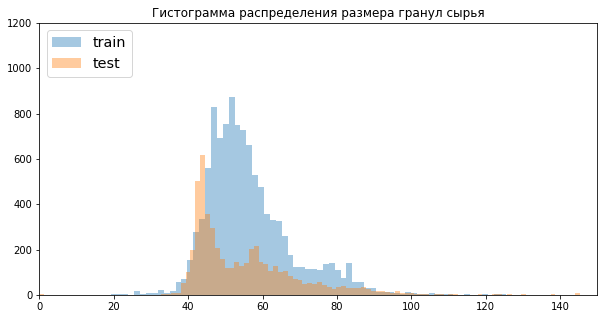

In [15]:
plt.figure(figsize=[10,5])

plt.hist(df_train['rougher.input.feed_size'], bins=300, label ='train', alpha=0.4)
plt.hist(df_test['rougher.input.feed_size'], bins=300, label ='test', alpha=0.4)

plt.xlim([0, 150])
plt.ylim([0, 1200])


plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения размера гранул сырья")
plt.show()

На графике видно нормальное распределение со смещением вправо на обеих выборках. 

Распределения похожи, делаем вывод что по данным выборкам возможно обучение. 

### Cуммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [16]:
primary_cleaner_output_concentrate_sum_train = (df_train['rougher.input.feed_au'] + 
                                                df_train['rougher.input.feed_ag'] + 
                                                df_train['rougher.input.feed_pb'] +
                                                df_train['rougher.input.feed_sol'])
rougher_output_concentrate_sum_train = (df_train['rougher.output.concentrate_au'] + 
                                        df_train['rougher.output.concentrate_ag'] + 
                                        df_train['rougher.output.concentrate_pb'] +
                                        df_train['rougher.output.concentrate_sol'])
final_output_concentrate_sum_train = (df_train['final.output.concentrate_au'] + 
                                      df_train['final.output.concentrate_ag'] + 
                                      df_train['final.output.concentrate_pb'] +
                                      df_train['final.output.concentrate_sol'])

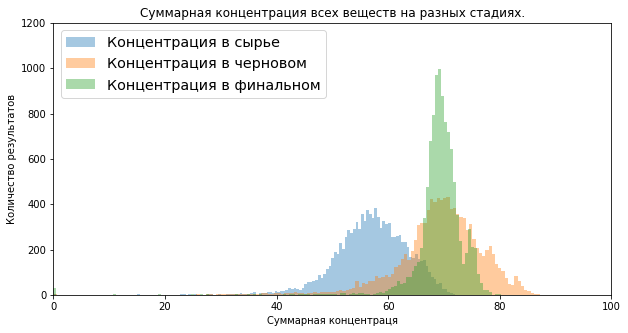

In [17]:
plt.figure(figsize=[10,5])

plt.hist(primary_cleaner_output_concentrate_sum_train, bins=150, label = 'Концентрация в сырье', alpha=0.4)
plt.hist(rougher_output_concentrate_sum_train, bins=150, label = 'Концентрация в черновом', alpha=0.4)
plt.hist(final_output_concentrate_sum_train, bins=150, label = 'Концентрация в финальном', alpha=0.4)

plt.xlim([0, 100])
plt.ylim([0, 1200])

plt.xlabel('Суммарная концентраця')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')

plt.title('Cуммарная концентрация всех веществ на разных стадиях.')
plt.show()

Удаление выбросов

In [18]:
df_train = df_train.drop(df_train[df_train['final.output.concentrate_au'] == 0].index)
df_train = df_train.drop(df_train[df_train['final.output.concentrate_ag'] == 0].index)
df_train = df_train.drop(df_train[df_train['final.output.concentrate_pb'] == 0].index)
df_train = df_train.drop(df_train[df_train['final.output.concentrate_sol'] == 0].index)

## Модель

### Функция для вычисления итоговой sMAPE

In [19]:
def sMAPE(target,features):
    error = np.mean(abs(target - features)/((abs(target)+abs(features))/2))*100
    return error

In [20]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [21]:
custom_score = make_scorer(sMAPE,greater_is_better=False)

### Работа с моделями


In [22]:
train_target_rougher = df_train['rougher.output.recovery']
train_target_final = df_train['final.output.recovery']

In [23]:
columns_to_delete = set(df_train.columns) - test_features_final
train_features_final = df_train.drop(columns_to_delete, axis=1)

columns_to_delete = set(train_features_final.columns) - test_features_rougher
train_features_rougher = train_features_final.drop(columns_to_delete, axis=1)

In [24]:
test_features_final = df_test
columns_to_delete = set(test_features_final.columns) - test_features_rougher
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

In [25]:
model_RFR = make_pipeline(StandardScaler(),RandomForestRegressor())
model_DTR = make_pipeline(StandardScaler(),DecisionTreeRegressor())
model_DTR

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [26]:
parameters_RFR = {'randomforestregressor__n_estimators':[1,100],
             'randomforestregressor__max_depth':[1,10]}
parameters_DTR = {'decisiontreeregressor__max_depth':[1,10]}

In [27]:
grid_rougher_RFR = GridSearchCV(model_RFR, param_grid = parameters_RFR, scoring=custom_score)
grid_final_RFR = GridSearchCV(model_RFR, param_grid = parameters_RFR, scoring=custom_score)
grid_rougher_DTR = GridSearchCV(model_DTR, param_grid = parameters_DTR, scoring=custom_score)
grid_final_DTR = GridSearchCV(model_DTR, param_grid = parameters_DTR,scoring=custom_score)

In [28]:
%%time


grid_rougher_RFR.fit(train_features_rougher,train_target_rougher)
grid_final_RFR.fit(train_features_final,train_target_final)
grid_rougher_DTR.fit(train_features_rougher,train_target_rougher)
grid_final_DTR.fit(train_features_final,train_target_final)

CPU times: user 3min, sys: 167 ms, total: 3min
Wall time: 3min 12s


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [1, 10]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [29]:
best_rougher_RFR = grid_rougher_RFR.best_score_
best_final_RFR = grid_final_RFR.best_score_
best_rougher_DTR = grid_rougher_DTR.best_score_
best_final_DTR = grid_final_DTR.best_score_

In [30]:
print('rougher')
print('RandomForest',best_rougher_RFR,'DecisionTree',best_rougher_DTR)
print('final')
print('RandomForest',best_final_RFR,'DecisionTree',best_final_DTR)

rougher
RandomForest -6.3157857763781795 DecisionTree -6.965374373672408
final
RandomForest -8.182338450102694 DecisionTree -8.235563066250974


In [31]:
rogher_test_pred_DTR = grid_rougher_DTR.predict(test_features_rougher)
final_test_pred_DTR = grid_final_DTR.predict(test_features_final)

In [32]:
final_sMAPE(sMAPE(test_target_rougher,rogher_test_pred_DTR),sMAPE(test_target_final,final_test_pred_DTR))

8.940166362192167

In [33]:
rogher_test_pred_RFR = grid_rougher_RFR.predict(test_features_rougher)
final_test_pred_RFR = grid_final_RFR.predict(test_features_final)

In [34]:
final_sMAPE(sMAPE(test_target_rougher,rogher_test_pred_RFR),sMAPE(test_target_final,final_test_pred_RFR))

8.78414802128101

Лучшая модель RandomForestRegressor. ЕЕ значение sMAPE самое низкое. 

In [35]:
constant_rougher = DummyRegressor(strategy="median")
constant_final = DummyRegressor(strategy="median")

In [36]:
constant_rougher.fit(train_features_rougher,train_target_rougher)
constant_final.fit(train_features_final,train_target_final)

DummyRegressor(strategy='median')

In [37]:
constant_rougher_prediction = constant_rougher.predict(test_features_rougher)
constant_final_prediction = constant_final.predict(test_features_final)

In [38]:
final_sMAPE(sMAPE(test_target_rougher,constant_rougher_prediction),sMAPE(test_target_final,constant_final_prediction))

9.093810363368728

Предсказание модели адекватно, так как sMAPE (9.0) на константном алгоритме выше, чем sMAPE (8.7) лучшей модели RandomForestRegressor

## Вывод

В данной работе были изучены три датасета.  

На этапе предобработки данных:
- подтверждена правильности рассчета эффективности обогащенияж
- проанализированы признаки, недоступные в тестовой выборке. Были определены их параметры и принадлежность к определенному типу;
- удалены NAN;
- восстановлены некоторые пропущенные стобцы в датасете с тестовой выборкой.

На этапе анализа данных:
- проанализирована изменчивость концентрации металлов Au, Ag, Pb на различных этапах очистки;
- выполнено сравнение распределения размеров гранул сырья на обучающей и тестовых выборках; 
- исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

На этапе работы с моделью:
- написана функция для вычисления итоговой sMAPE;
- обучены две модели и оценено их качество;
- выбрана лучшая модель RandomForestRegressor и проверена на тестовой выборке.